In [ ]:
!wget https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0

--2022-01-05 15:14:08--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-01-05 15:14:09--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5464997a15fd8406012b7deb52.dl.dropboxusercontent.com/cd/0/inline/BdPmXbumtsg8t0j1rPyWJ7BZPwJTRPunxZQ4OLt7t4LsRcGx0iBWZmKhIopHejESLVEJAwz6ZcK3qRvKPv4gD_tLKnYX9yhVs9zAxyMIU3W4ToRQaQ--VFXLJXjE5gl9E0Ft4oIpd9ZJePvzO7yqu0Yh/file# [following]
--2022-01-05 15:14:09--  https://uc5464997a15fd8406012b7deb52.dl.dropboxusercontent.com/cd/0/inline/BdPmXbumts

In [ ]:
!unzip CovidDataset-20200427T133042Z-001.zip?dl=0

Archive:  CovidDataset-20200427T133042Z-001.zip?dl=0
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: cc
error:  invalid response [cc]
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: cc
error:  invalid response [cc]
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


In [ ]:
#CNN Based Model in Keras

Model = Sequential()
Model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape = (224,224,3)))
Model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.25))

Model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.25))

Model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.25))

Model.add(Flatten())
Model.add(Dense(64,activation='relu'))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation='sigmoid'))
Model.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 110, 110, 64)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                 

In [ ]:
Model.compile(loss =keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
# Train from scratch

train_datagen = image.ImageDataGenerator(
                rescale = 1.0/255,
                shear_range=0.2,
                zoom_range = 0.2,
                horizontal_flip=True
)

test_dataset = image.ImageDataGenerator(rescale = 1.0/255)




In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size =32,
    class_mode = 'binary')




Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
val_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size =32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
hist = Model.fit(
    train_generator,
    steps_per_epoch =7,
    epochs=20,
    validation_data =val_generator,
    validation_steps =2
    
)

Epoch 1/20
7/7 [==============================] - 12s 2s/step - loss: 1.9350 - accuracy: 0.5134 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 11s 2s/step - loss: 0.6811 - accuracy: 0.5670 - val_loss: 0.6851 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 10s 2s/step - loss: 0.6300 - accuracy: 0.6339 - val_loss: 0.6306 - val_accuracy: 0.5167
Epoch 4/20
7/7 [==============================] - 11s 2s/step - loss: 0.5318 - accuracy: 0.7009 - val_loss: 0.5363 - val_accuracy: 0.7167
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.4343 - accuracy: 0.8170 - val_loss: 0.4123 - val_accuracy: 0.8500
Epoch 6/20
7/7 [==============================] - 10s 2s/step - loss: 0.3108 - accuracy: 0.8661 - val_loss: 0.1917 - val_accuracy: 0.9667
Epoch 7/20
7/7 [==============================] - 10s 2s/step - loss: 0.2863 - accuracy: 0.9018 - val_loss: 0.1512 - val_accuracy: 0.9667
Epoch 8/20
7/7 [==================

In [ ]:
h = hist.history
max_idx = np.argmax(h['val_accuracy'])

In [ ]:
print(h['val_accuracy'][max_idx])
print(h['accuracy'][max_idx])


0.9833333492279053
0.9196428656578064


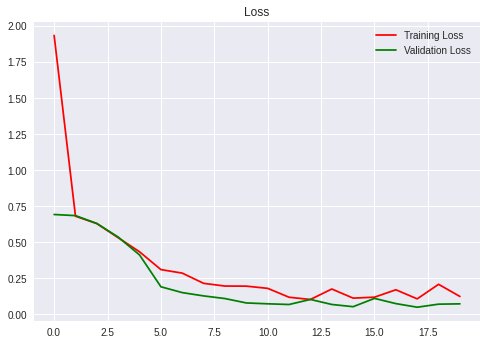

In [ ]:
## Loss
plt.style.use("seaborn")
plt.plot(h['loss'],c='red',label ='Training Loss')
plt.plot(h['val_loss'],c='green',label ='Validation Loss')
plt.title("Loss")
plt.legend()
plt.show()

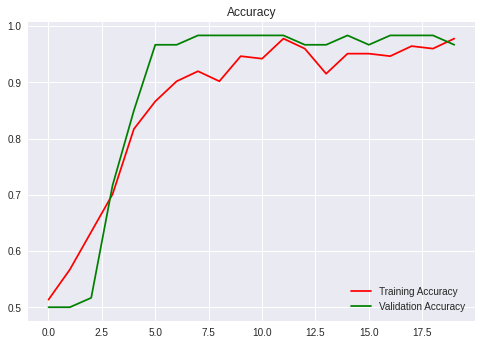

In [ ]:
## Accuracy
plt.style.use("seaborn")
plt.plot(h['accuracy'],c='red',label ='Training Accuracy')
plt.plot(h['val_accuracy'],c='green',label ='Validation Accuracy')
plt.title("Accuracy")
plt.legend()
plt.show()